# "An√°lisis y Visualizaci√≥n de Datos M√©dicos con Python"

üéØEste proyecto tiene como objetivo explorar un conjunto de datos m√©dicos que incluye informaci√≥n sobre medidas corporales, indicadores sangu√≠neos, h√°bitos de estilo de vida y presencia de enfermedades card√≠acas. A trav√©s de t√©cnicas de an√°lisis de datos y visualizaci√≥n, buscamos identificar patrones y relaciones significativas entre estas variables.

üìå Puedes descargar la data para procesar aqu√≠: üëâ https://github.com/WLozanoH/Heart-Disease-Prediction/blob/main/medical_examination.zip

In [103]:
#Importamos las librer√≠as necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

üìå 1. Importamos la data 'medical_examination.csv'

In [104]:
df = pd.read_csv('medical_examination.csv', index_col='id')
df.head()

age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                             
0   18393    2     168    62.0    110     80            1     1      0     0   
1   20228    1     156    85.0    140     90            3     1      0     0   
2   18857    1     165    64.0    130     70            3     1      0     0   
3   17623    2     169    82.0    150    100            1     1      0     0   
4   17474    1     156    56.0    100     60            1     1      0     0   

    active  cardio  
id                  
0        1       0  
1        1       1  
2        0       1  
3        1       1  
4        0       0

    sex = sexo(0:mujer, 1: hombre) --modificar valores
    ap_hi = presi√≥n arterial sist√≥lica
    ap_lo = presi√≥n arterial diast√≥lica
    cholesterol = colesterol
    gluc = glucosa
    smoke = fumador (0:no, 1, yes)
    alco = consumo de alcohol (0:no, 1:yes)
    active = actividad f√≠sica (0:no, 1:yes)
    cardio = Presencia o ausencia de enfermedades cardiovasculares (0:no, 1:yes)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [106]:
#observando valores en la variable 'sex'
df['sex'].value_counts()

sex
1    45522
2    24467
3       11
Name: count, dtype: int64

In [107]:
#modificando valores para 'sex' (0:mujer, 1: hombre)
# reemplazamos (2,0)
# reemplazamos (3,0)
df['sex'] = df['sex'].replace({2:0, 3:0})

In [108]:
df['sex'].value_counts() #verificamos el reemplazo

sex
1    45522
0    24478
Name: count, dtype: int64

üìå 2. para crear la variable sobrepeso 'overweight', necesitamos el IMC(√≠ndice de masa corporal)

IMC = peso/(altura(mts)) ^2

In [109]:
#calculando el √≠ndice de masa corporal 

#convertimos la altura de cm a mts, dividiendo por 100
df['height_mts'] = df['height']/100
#calculamos el √≠ndice de masa corporal(IMC)
df['IMC'] = df['weight'] / (df['height_mts']**2)     #En python la potencia se expresa con **

#Calcular la variable sobrepeso('overweight')
#Seg√∫n la OMS >25: 1(tiene sobre peso), <25: 0( no tiene sobre peso) 

df['overweight'] = df['IMC'].apply(lambda x: 1 if x > 25 else 0)

In [110]:
#obseramos la cantidad de personas con sobre peso
count_overweight = df['overweight'].value_counts()

#calculamos el porcentaje de personas con sobre peso
percentage_overweight = (df['overweight'].value_counts()/len(df)) * 100

#Mostramos los resultados en un formato claro:
print(f'cantidad de personas con sobrepeso')
print(count_overweight)      
print('------------------------------')
print('Porcentaje de personas con sobrepeso')
for label, porcentage in percentage_overweight.items():
    print(f"{label}: {porcentage:.2f}%")

cantidad de personas con sobrepeso
overweight
1    43546
0    26454
Name: count, dtype: int64
------------------------------
Porcentaje de personas con sobrepeso
1: 62.21%
0: 37.79%


üìå 3.- Normalizamos los valores de colesterol y glucosa en categor√≠as binarias (bueno/malo)

    bueno: 0
    malo: 1

Si el valor de colesterol o glucosa es 1, establezca el valor en 0. Si el valor es mayor que 1, establezca el valor en 1.*

In [111]:
df['gluc'].value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [112]:
df['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [113]:
df['cholesterol'] = df['cholesterol'].apply(lambda x:0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x:0 if x == 1 else 1)

In [114]:
print(df['gluc'].value_counts())
print(df['cholesterol'].value_counts())

gluc
0    59479
1    10521
Name: count, dtype: int64
cholesterol
0    52385
1    17615
Name: count, dtype: int64


üìå 4. Creamos un gr√°fico categ√≥rico utilizando Seaborn y un gr√°fico de 'countplot' para mostrar distribuciones clave.

In [115]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'height_mts', 'IMC',
       'overweight'],
      dtype='object')

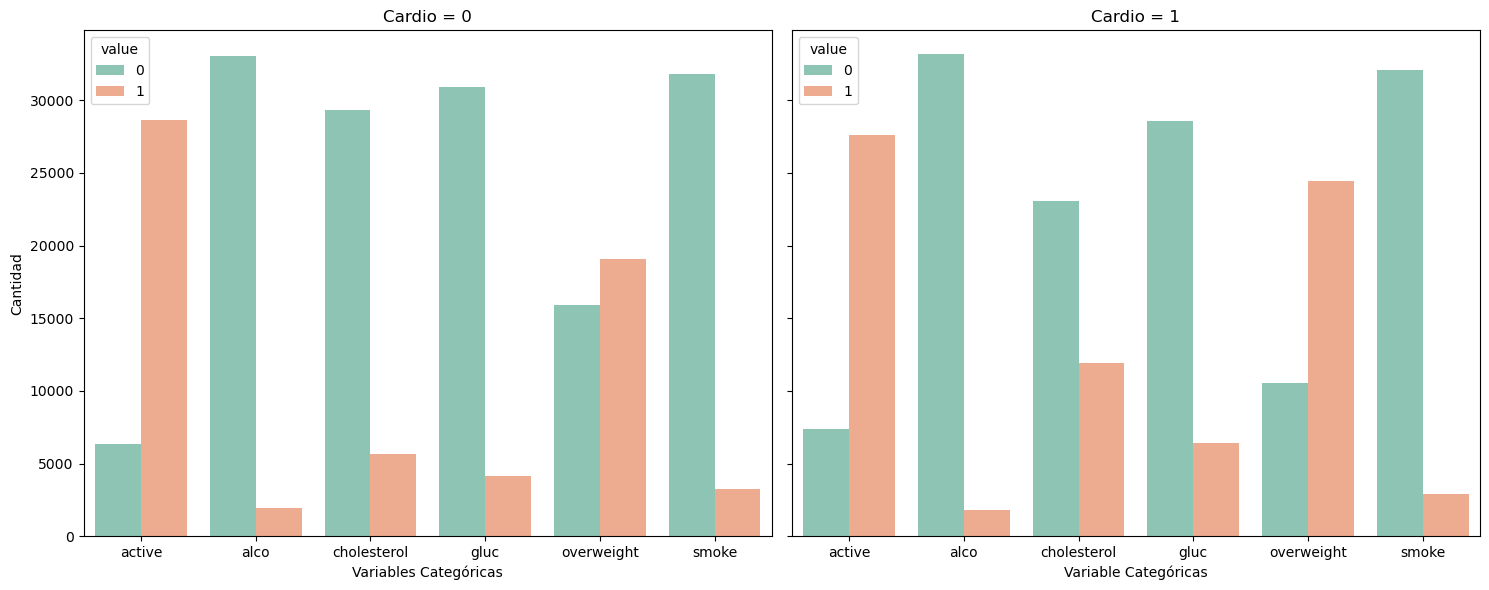

In [116]:
#variables categ√≥ricas a analizar 
categorical_vars = ['active','alco','cholesterol','gluc','overweight','smoke']

#convertir los datos a formato long usando 'pd.melt()'
df_long = pd.melt(df, id_vars=['cardio'], value_vars=categorical_vars, 
                  var_name='variable', value_name='value')

#filtramos los datos por cardio
df_cardio_0 = df_long[df_long['cardio']== 0]
df_cardio_1 =df_long[df_long['cardio'] == 1]

#crear dos gr√°ficos: uno para cada grupo de cardio
fig, axes = plt.subplots(1,2, figsize=(15,6), sharey=True)

#creamos gr√°fico cardio = 0
sns.countplot(data=df_cardio_0, x='variable', hue='value', palette='Set2', ax=axes[0], alpha=0.8)
axes[0].set_title('Cardio = 0')
axes[0].set_xlabel('Variables Categ√≥ricas')
axes[0].set_ylabel('Cantidad')

#creamos gr√°fico cardio = 1
sns.countplot(data=df_cardio_1, x='variable', hue='value', palette='Set2', ax=axes[1], alpha=0.8)
axes[1].set_title('Cardio = 1')
axes[1].set_xlabel('Variable Categ√≥ricas')
axes[1].set_ylabel('Cantidad')

#Ajustamos el dise√±o del gr√°fico
plt.tight_layout()

#Mostramos el gr√°fico
plt.show()


üìùConclusiones sobre el gr√°fico analizado:

‚úÖSobrepeso y enfermedades card√≠acas: Las personas con sobrepeso (overweight = 1) tienen una mayor prevalencia de enfermedades card√≠acas (cardio = 1), lo que confirma el sobrepeso como un factor de riesgo significativo.

‚úÖColesterol y glucosa (malo = 1): En el grupo con enfermedades card√≠acas, hay m√°s personas con valores malos de colesterol y glucosa, reforzando que estas condiciones est√°n estrechamente relacionadas con el riesgo cardiovascular.
    
‚úÖActividad f√≠sica: La actividad f√≠sica (active = 1) es m√°s com√∫n en el grupo sin enfermedades card√≠acas, indicando su rol protector frente a estas enfermedades.

‚úÖTabaquismo: El tabaquismo (smoke = 1) no muestra una diferencia significativa entre los dos grupos, por lo tanto, 'smoke' en este an√°lisis no muestra una asociaci√≥n fuerte ni directa con la presencia de enfermedades card√≠acas.

En conclusi√≥n, los factores de riesgo m√°s destacados son el sobrepeso, valores malos de colesterol/glucosa e inactividad f√≠sica. Estos deben ser priorizados en estrategias de prevenci√≥n de enfermedades cardiovasculares.

    

üìå 5. Vamos a filtrar segmentos de pacientes que representan datos inconsistentes basados en l√≠mites estad√≠sticos y coherencia.

Verificar informaci√≥n:

‚úîÔ∏èLa presi√≥n sist√≥lica es m√°s alta que la diast√≥lica 

‚úîÔ∏èLa altura es mayor que el percentil 2.5

‚úîÔ∏èla altura es menor que el percentil 97.5

‚úîÔ∏èEl peso es mayor que el percentil 2.5

‚úîÔ∏èEl peso es menor que el percentil 97.5

    ap_hi = Presi√≥n arterial sist√≥lica
    ap_lo = Presi√≥n arterial diast√≥lica

In [117]:
print('Antes',df.shape)
#Corrigiendo los datos

#La presi√≥n sist√≥lica es m√°s alta que la diast√≥lica
df = df[df['ap_hi'] >= df['ap_lo']]
print(df.shape)

#La altura es mayor que el percentil 2.5
df = df[df['height'] >= df['height'].quantile(0.025)]
print(df.shape)

#la altura es menor que el percentil 97.5
df = df[df['height'] <= df['height'].quantile(0.975)]
print(df.shape)

# El peso es mayor que el percentil 2.5
df = df[df['weight'] >= df['weight'].quantile(0.025)]
print(df.shape)

# El peso es menor que el percentil 97.5
df = df[df['weight'] <= df['weight'].quantile(0.975)]

print(f'Despu√©s',df.shape)

Antes (70000, 15)
(68766, 15)
(67260, 15)
(65859, 15)
(64384, 15)
Despu√©s (62784, 15)


In [120]:
#Eliminamos las variables: 'height_mts','IMC'
print(df.shape)
df = df.drop(columns=['height_mts','IMC'])
print(df.shape)

(62784, 15)
(62784, 13)


üìå 6.  Generamos una matriz de correlaci√≥n visualizada con un mapa de calor para identificar la relaciones entre las variables.

    Usando 'heatmap' y enmascarando el tr√≠angulo superior del mapa de calor usando 'numpy'

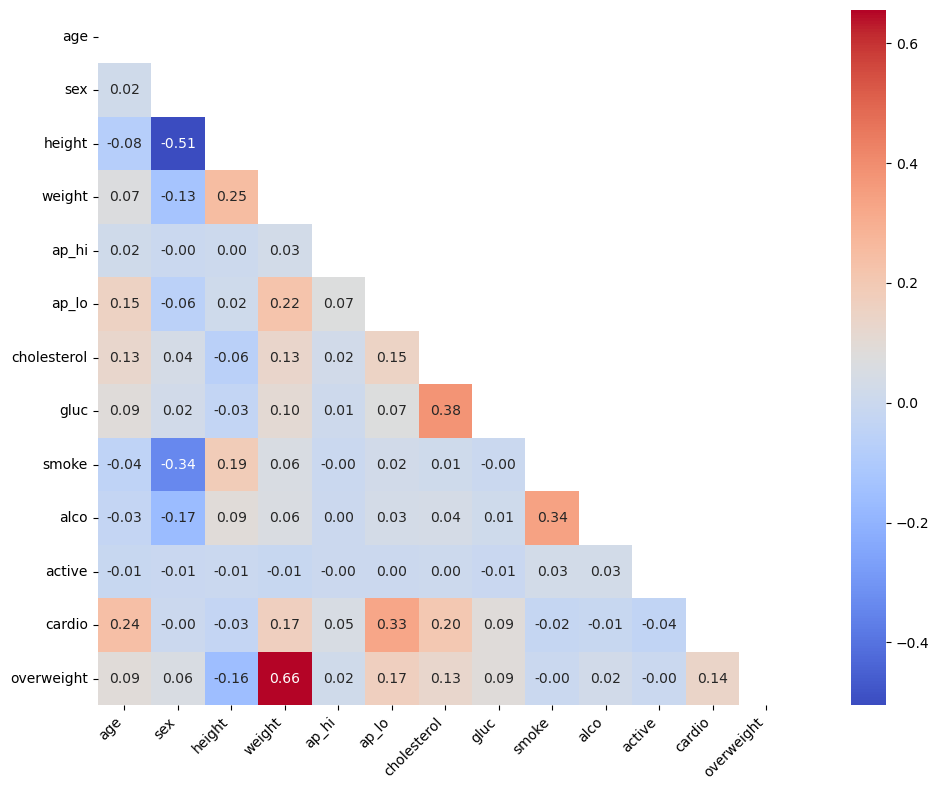

In [125]:
#Creando un dataframe para el mapa de calor
df_heat = df

#crear la matriz de correlaci√≥n 
correlaci√≥n = df_heat.corr()

# crear una m√°scara para el tri√°ngulo superior
mask = np.triu(np.ones_like(correlaci√≥n, dtype = bool)) #np.triu para el triangulo superior, np.ones_like que complete con '1'

#caracter√≠sticas del gr√°fico
plt.figure(figsize=(12,8))

#graficando el mapa de calor
sns.heatmap(correlaci√≥n, mask=mask, annot=True, cmap='coolwarm', square=True, fmt='.2f')


#rotamos las etiquetas del eje x para que se vean correctamente
plt.xticks(rotation = 45, ha = 'right')   #Alinear etiquetas del eje x 45¬∞ a la derecha

#Ajustamos el dise√±o del gr√°fico y mostramos
plt.tight_layout()
plt.show()

    En resumen, el mapa de calor proporciona una visualizaci√≥n clara de las relaciones entre las variables, destacando el peso y el colesterol como los factores con mayor influencia en la salud cardiovascular, mientras que otros factores como sexo y actividad f√≠sica muestran relaciones m√°s d√©biles con las enfermedades card√≠acas en este conjunto de datos.

## Resumen del Proyecto:

‚úÖ Preprocesamiento y Limpieza de Datos:

Calcular el IMC para clasificar pacientes con sobrepeso.
Normalizar los valores de colesterol y glucosa en categor√≠as binarias (bueno/malo).
Filtrar datos inconsistentes basados en l√≠mites estad√≠sticos y coherencia.

‚úÖ An√°lisis Exploratorio:

Comparar caracter√≠sticas categ√≥ricas (como colesterol, glucosa, fumar, alcohol) entre pacientes con y sin enfermedades card√≠acas.
Examinar correlaciones entre las variables para detectar patrones significativos.

‚úÖ Visualizaci√≥n de Datos:

Crear gr√°ficos categ√≥ricos utilizando Seaborn para mostrar distribuciones clave.
Generar una matriz de correlaci√≥n visualizada con un mapa de calor para identificar relaciones entre las variables.

‚úÖ Tecnolog√≠as Utilizadas:

Python: Pandas, Matplotlib, Seaborn.
Este proyecto combina an√°lisis estad√≠stico y visualizaci√≥n para comprender mejor los factores que influyen en las enfermedades card√≠acas, destacando c√≥mo los h√°bitos y medidas corporales afectan la salud.